## Policy iteration

Dans ce notebook, nous allons implémenter un algorithme de programmation dynamique appelé *policy iteration*.

Il consiste à entrelacer 2 processus : **évaluation** d'une politique et son **amélioration**, jusqu'à ce que la politique optimale soit atteinte ainsi que les valeurs d'état.

C'est un processus qui améliore alternativement les valeurs estimées des état et la politique.

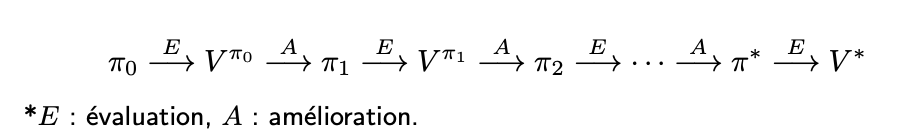


La politique et les valeurs sont initialisés arbitrairement.

L'algorithme alterne une phase d'évaluation de la politique avec une phase d'amélioration de celle-ci jusqu'à obtenir une politique *stable*.

## Gérer les imports

In [19]:
import gym
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython import display

from bucket_env import BucketEnv3
from bucket_env import plot_stats, testing, rendering
%matplotlib inline

## Initialiser l'environnement
Pour créer l'environnement, il faut simplement créer une instance de `BucketEnv3`

In [20]:
env = BucketEnv3()

## Definition de la politique $\pi(\cdot|s)$

#### Création de la politique $\pi(\cdot|s)$

In [21]:
policy_probs = np.full((7,7,7,5),0.2)

In [38]:
def policy(state):
    return policy_probs[state]

#### Test de la politique avec l'état (0, 0, 0)

#### Voyons comment cela se comporte 

## Définition de la table de valeur $V(s)$

#### Création de la table $V(s)$

In [22]:
state_values = np.zeros((7,7,7))

#### Tester la politique avec l'état (0, 0, 0)

## Implementation de l'algorithme

</br>

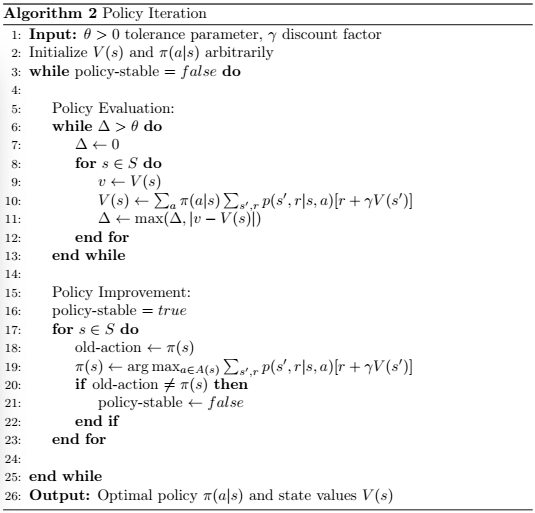
</br>
<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>



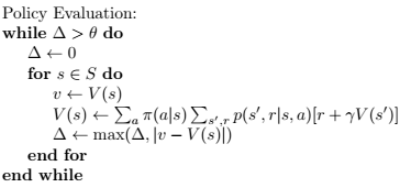

In [23]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    while delta > theta:
        delta = 0
        for x1 in range(5):
            for x2 in range(5):
                for x3 in range(5):
                    state = (x1,x2,x3)
                    old_values = state_values[state]
                    action_probs = policy_probs[state]
                    new_value = 0.
                    for action, prob in enumerate(action_probs):
                        next_state, reward, _, _ = env.simulate_step(state,action)
                        new_value += prob * (reward + gamma * state_values[next_state])
                    state_values[state] = new_value
                    delta = max(delta,abs(new_value - old_values))



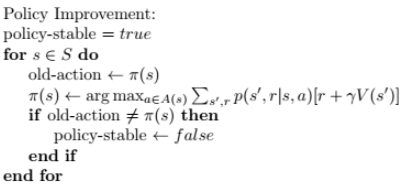

In [24]:
def policy_improvement(policy_probs, state_values, gamma=0.99):
    policy_stable = True
    for x1 in range(5):
        for x2 in range(5):
            for x3 in range(5):
                state = (x1,x2,x3)
                old_action = policy_probs[state].argmax()

                new_action = None
                max_qsa = float("-inf")

                for action in range(5):
                    next_state, reward, _, _ = env.simulate_step(state, action)
                    qsa = reward + gamma * state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa = qsa
                        new_action = action

                action_probs = np.zeros(5)
                action_probs[new_action] = 1.
                policy_probs[state] = action_probs

                if new_action != old_action:
                    policy_stable = False
    return policy_stable


In [39]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=.99):
    policy_stable = False
    loop = 0
    while not policy_stable:
        loop += 1
        policy_evaluation(policy_probs,state_values)
        policy_stable = policy_improvement(policy_probs, state_values)
    print(f"L'apprentissage a convergé en {loop} étapes") 

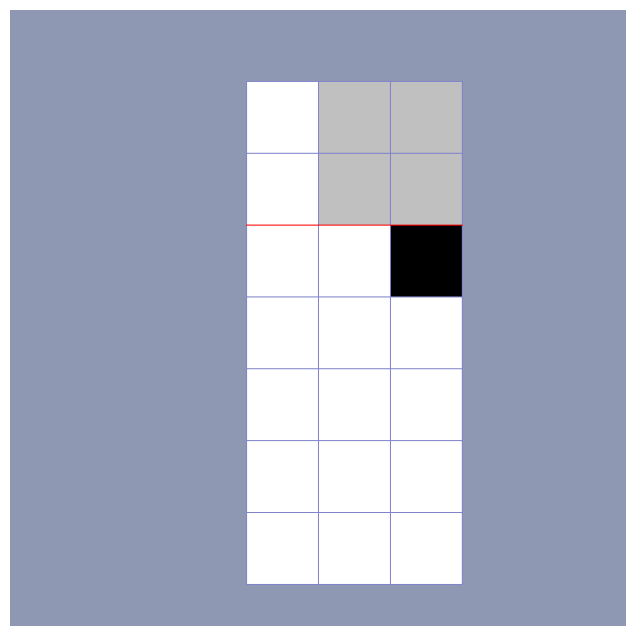

In [40]:
policy_iteration(policy_probs,state_values)
rendering(env,policy)